     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]
     Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   0            0   25.355     4
1     47    1   1            0   13.093     2
2     47    1   1            0   10.114     2
3     28    0   2            0    7.798     3
4     61    0   1            0   18.043     4
..   ...  ...  ..          ...      ...   ...
195   56    0   1            0   11.567     2
196   16    1   1   

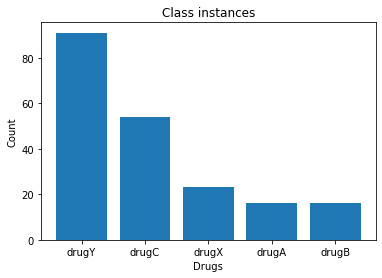

In [1]:
import pandas
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


drugs = pandas.read_csv(os.getcwd()+'/drug200.csv')

d = dict(drugs['Drug'].value_counts())

plt.bar(drugs['Drug'].unique(),d.values())
plt.xlabel("Drugs")
plt.ylabel("Count")
plt.title("Class instances")

print(drugs)

labelEncoder = preprocessing.LabelEncoder();
drugs["Drug"] = labelEncoder.fit_transform(drugs["Drug"])
drugs["Sex"] = labelEncoder.fit_transform(drugs["Sex"])
drugs["BP"] = labelEncoder.fit_transform(drugs["BP"])
drugs["Cholesterol"] = labelEncoder.fit_transform(drugs["Cholesterol"])

print(drugs)

y = drugs["Drug"]
del drugs["Drug"]
x = drugs
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [9]:
# 6(a)
from sklearn.naive_bayes import GaussianNB
                
gauss = GaussianNB()
gauss.fit(x_train, y_train)

prediction = gauss.predict(x_test)
predictionTable = pandas.DataFrame({'prediction':prediction,'test_data':y_test.values}, columns=["prediction","test_data"])
print(predictionTable)

    prediction  test_data
0            0          4
1            4          4
2            0          4
3            3          3
4            4          3
5            4          4
6            4          4
7            4          4
8            3          3
9            3          3
10           4          4
11           4          4
12           0          0
13           3          3
14           4          4
15           3          3
16           3          3
17           3          3
18           1          1
19           2          2
20           0          0
21           4          4
22           0          0
23           3          3
24           4          4
25           4          4
26           4          4
27           3          3
28           2          4
29           1          4
30           2          2
31           2          2
32           3          3
33           0          4
34           4          4
35           1          1
36           4          4
37          

In [10]:
# 6(b)
from sklearn.tree import DecisionTreeClassifier
                
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

prediction = dtc.predict(x_test)
predictionTable = pandas.DataFrame({'prediction':prediction,'test_data':y_test.values}, columns=["prediction","test_data"])
print(predictionTable)

    prediction  test_data
0            4          4
1            4          4
2            4          4
3            3          3
4            4          3
5            4          4
6            4          4
7            4          4
8            3          3
9            3          3
10           4          4
11           4          4
12           0          0
13           3          3
14           4          4
15           3          3
16           3          3
17           3          3
18           1          1
19           2          2
20           0          0
21           4          4
22           0          0
23           3          3
24           4          4
25           4          4
26           4          4
27           3          3
28           4          4
29           4          4
30           2          2
31           2          2
32           3          3
33           4          4
34           4          4
35           1          1
36           4          4
37          

In [16]:
# 6(c)
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['entropy'],  
              'max_depth': [3, 4], 
              'min_samples_split': [3, 4, 5]}  
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(x_train, y_train) 
 
prediction = grid.predict(x_test)
predictionTable = pandas.DataFrame({'prediction':prediction,'test_data':y_test.values}, columns=["prediction","test_data"])
print(predictionTable)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
    prediction  test_data
0            4          4
1            4          4
2            4          4
3            3          3
4            4          3
5            4          4
6            4          4
7            4          4
8            3          3
9            3          3
10           4          4
11           4          4
12           0          0
13           3          3
14           4          4
15           3          3
16           3          3
17           3          3
18           1          1
19           2          2
20           0          0
21           4          4
22           0          0
23           3          3
24           4          4
25           4          4
26           4          4
27           3          3
28           4          4
29           4          4
30           2          2
31           2          2
32           3          3
33           4          4
34           4          4
35  

In [17]:
# 6(d)
from sklearn.linear_model import Perceptron

perc = Perceptron() 
perc.fit(x_train, y_train) 
 
prediction = perc.predict(x_test)
predictionTable = pandas.DataFrame({'prediction':prediction,'test_data':y_test.values}, columns=["prediction","test_data"])
print(predictionTable)

    prediction  test_data
0            4          4
1            4          4
2            4          4
3            2          3
4            2          3
5            4          4
6            4          4
7            4          4
8            2          3
9            2          3
10           2          4
11           4          4
12           2          0
13           2          3
14           4          4
15           2          3
16           2          3
17           2          3
18           2          1
19           2          2
20           4          0
21           4          4
22           4          0
23           2          3
24           4          4
25           4          4
26           4          4
27           2          3
28           2          4
29           2          4
30           2          2
31           2          2
32           2          3
33           4          4
34           4          4
35           2          1
36           4          4
37          

In [30]:
# 6(e)
from sklearn.neural_network import MLPClassifier

# we added max_iter due to an error occuring when default = 200
mlp = MLPClassifier(hidden_layer_sizes = (100,), activation = 'logistic', solver = 'sgd', max_iter=10000) 
mlp.fit(x_train, y_train) 
 
prediction = mlp.predict(x_test)
predictionTable = pandas.DataFrame({'prediction':prediction,'test_data':y_test.values}, columns=["prediction","test_data"])
print(predictionTable)

    prediction  test_data
0            4          4
1            4          4
2            4          4
3            3          3
4            1          3
5            4          4
6            4          4
7            4          4
8            3          3
9            3          3
10           4          4
11           4          4
12           4          0
13           3          3
14           4          4
15           3          3
16           3          3
17           3          3
18           1          1
19           3          2
20           4          0
21           4          4
22           4          0
23           3          3
24           4          4
25           4          4
26           4          4
27           3          3
28           4          4
29           1          4
30           3          2
31           3          2
32           3          3
33           4          4
34           4          4
35           1          1
36           4          4
37          

In [31]:
# 6(f)
param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],  
              'hidden_layer_sizes': [(30, 50), (10, 10, 10)], 
              'solver': ['adam']}  
mlp_grid = GridSearchCV(MLPClassifier(max_iter=10000), param_grid, refit = True, verbose = 3,n_jobs=-1) 
mlp_grid.fit(x_train, y_train) 
 
prediction = mlp_grid.predict(x_test)
predictionTable = pandas.DataFrame({'prediction':prediction,'test_data':y_test.values}, columns=["prediction","test_data"])
print(predictionTable)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
    prediction  test_data
0            4          4
1            4          4
2            4          4
3            3          3
4            4          3
5            4          4
6            4          4
7            4          4
8            3          3
9            3          3
10           4          4
11           4          4
12           0          0
13           3          3
14           4          4
15           3          3
16           3          3
17           3          3
18           1          1
19           2          2
20           0          0
21           4          4
22           0          0
23           3          3
24           4          4
25           4          4
26           4          4
27           3          3
28           4          4
29           1          4
30           2          2
31           2          2
32           3          3
33           4          4
34           4          4
35  